# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:


import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sns       
import datetime as dt      


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:


temp = pd.read_csv("Temp_States.csv")

temp.head()


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
temp.info()

# the city and state are in categorical type, while the temprature is numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Select the rows where state is New York

In [7]:

new_york = temp[temp["State"] == "New York"]

print(new_york)


      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
average_temp_ny = new_york["Temperature"].mean()
print(average_temp_ny)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [14]:
Temp_above_15 = temp[temp["Temperature"] >15]


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [13]:
print(Temp_above_15)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [20]:
temp_condition = (temp['Temperature'] >15) & (temp['Temperature'] < 20)

mild_cities = temp[temp_condition]

print(mild_cities)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222


In [19]:
temp['State'].value_counts()

State
New York       3
Connecticut    2
New Jersey     2
Name: count, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [21]:
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std'])
print(state_stats)

                  mean       std
State                           
Connecticut  15.833333  1.964186
New Jersey   21.111111  1.571348
New York     10.740741  8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [22]:



employee = pd.read_csv("Employee.csv")

employee.head()


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [ ]:
employee.info()
#exists 5 categorical values and two numerical ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

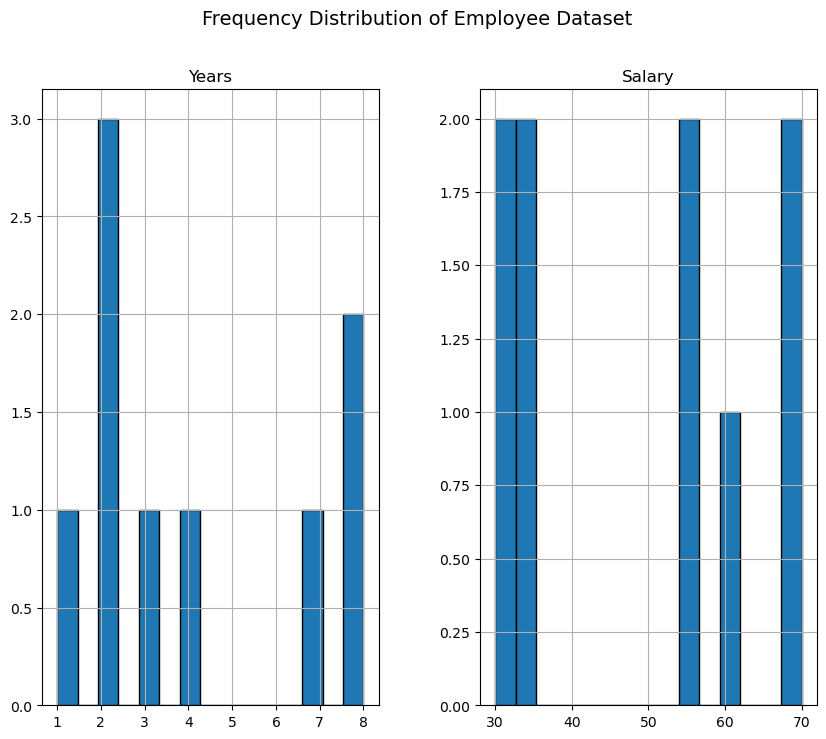

In [24]:
employee.hist(figsize=(10, 8), bins=15, edgecolor='black')
plt.suptitle("Frequency Distribution of Employee Dataset", fontsize=14)
plt.show()

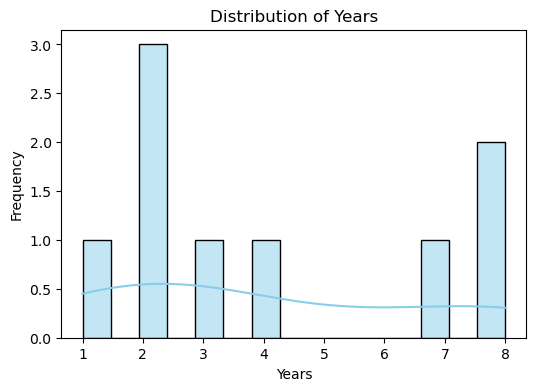

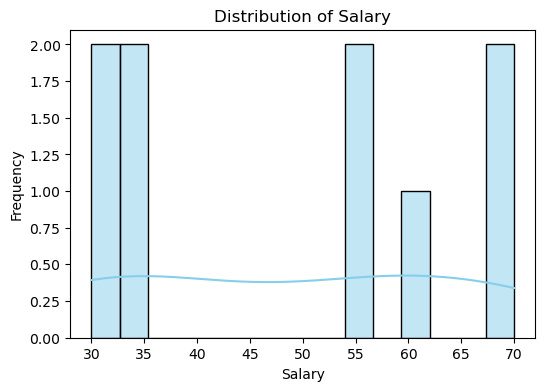

In [25]:
for col in employee.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data=employee, x=col, kde=True, bins=15, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### What's the average salary in this company?

In [26]:
average_salary = employee["Salary"].mean()
print("Average salary in the company:", average_salary)

Average salary in the company: 48.888888888888886


#### What's the highest salary?

In [27]:
maximum_salary = employee["Salary"].max()
print("Maximum salary in the company:", maximum_salary)

Maximum salary in the company: 70


#### What's the lowest salary?

In [28]:
minimum_salary = employee["Salary"].mean()
print("Minimum salary in the company:", minimum_salary)

Minimum salary in the company: 48.888888888888886


#### Who are the employees with the lowest salary?

In [30]:
lowest_salary_employees = employee[employee["Salary"] == min_salary]


print(lowest_salary_employees)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Could you give all the information about an employee called David?

In [31]:
david_info = employee[employee["Name"] == "David"]

print(david_info)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [32]:
david_salary = employee.loc[employee["Name"] == "David", "Salary"]

print(david_salary)

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [37]:
associates = employee[employee["Title"] == "associate"]

print(associates)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [38]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [39]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [ ]:
high_paid_associates = employee[
    (employee["Title"] == "associate") & 
    (employee["Salary"] > 55)]


print(high_paid_associates)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [ ]:
avg_salary_by_years = employee.groupby("Years")["Salary"].mean()

print(avg_salary_by_years)

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [43]:
avg_salary_by_title = employee.groupby("Title")["Salary"].mean()

print(avg_salary_by_title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

First Quartile (Q1): 35.0
Median (Q2): 55.0
Third Quartile (Q3): 60.0


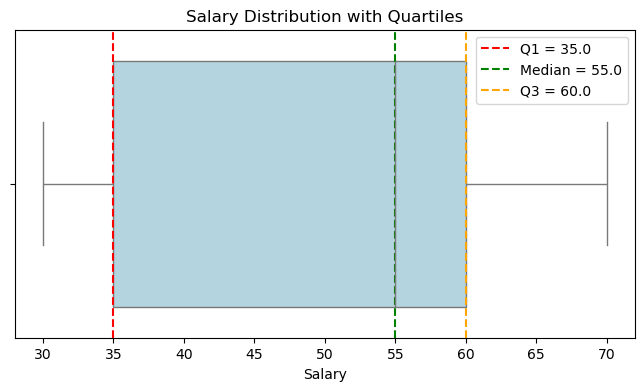

In [45]:
q1 = employee["Salary"].quantile(0.25)
median = employee["Salary"].median()
q3 = employee["Salary"].quantile(0.75)

# Print quartile values
print("First Quartile (Q1):", q1)
print("Median (Q2):", median)
print("Third Quartile (Q3):", q3)

# Create the boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=employee["Salary"], color="lightblue")

# Add vertical lines and labels for Q1, median, and Q3
plt.axvline(q1, color='red', linestyle='--', label=f'Q1 = {q1}')
plt.axvline(median, color='green', linestyle='--', label=f'Median = {median}')
plt.axvline(q3, color='orange', linestyle='--', label=f'Q3 = {q3}')

# Add title and legend
plt.title("Salary Distribution with Quartiles")
plt.xlabel("Salary")
plt.legend()
plt.show()

In [49]:
q1 = employee["Salary"].quantile(0.25)
q1

np.float64(35.0)

In [50]:
q3 = employee["Salary"].quantile(0.75)
q3

np.float64(60.0)

#### Is the mean salary per gender different?

In [51]:
avg_salary_by_gender = employee.groupby("Gender")["Salary"].mean()

print("Average salary per gender:")
print(avg_salary_by_gender)

Average salary per gender:
Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [53]:
employee = pd.read_csv("Employee.csv")


numeric_cols = employee.select_dtypes(include='number').columns


dept_stats = employee.groupby("Department")[numeric_cols].agg(["min", "mean", "max"])


print(dept_stats)

           Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [55]:
employee = pd.read_csv("Employee.csv")


salary_range = employee.groupby("Department")["Salary"].agg(
    lambda x: x.max() - x.min())


print(salary_range)


Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [56]:
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [57]:
orders = pd.read_csv("Orders.csv")


print("=== Data Types ===")
print(orders.dtypes)

print("\n=== Summary Statistics ===")
print(orders.describe())

=== Data Types ===
Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

=== Summary Statistics ===
          Unnamed: 0      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   278465.221859  560617.126645    2010.934259       7.612537   
std    152771.368303   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%    148333.750000  549234.000000    2011.000000       5.000000   
50%    284907.500000  561893.000000    2011.000000       8.000000   
75%    410079.250000  572090.000000    2011.000000      11.000000   
max    541908.000000  581587.000000    2011.000000 

In [58]:
# 4 object columns, 8 interger columns, and 2 floats

####  What is the average Purchase Price?

In [60]:
average_purchase_price = orders["UnitPrice"].mean()

print("Average Purchase Price:", average_purchase_price)

Average Purchase Price: 3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [61]:
highest_purchase_price = orders["UnitPrice"].max()

print("maximum Purchase Price:", highest_purchase_price)

maximum Purchase Price: 8142.75


In [62]:
lowest_purchase_price = orders["UnitPrice"].min()

print("Cheapest Purchase Price:", lowest_purchase_price)

Cheapest Purchase Price: 0.0


#### Select all the customers we have in Spain

In [63]:
customers_spain = orders[orders["Country"] == "Spain"]

print(customers_spain)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [64]:
country_counts = orders["Country"].value_counts()

print("Number of customers in Spain:", country_counts["Spain"])

Number of customers in Spain: 2485


#### Select all the customers who have bought more than 50 items ?

In [65]:
customers_over_50 = orders[orders["Quantity"] > 50]


print(customers_over_50)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
46              46     536371     22086  2010     12    3     9   
83              83     536376     21733  2010     12    3     9   
96              96     536378     21212  2010     12    3     9   
102            102     536378    85071B  2010     12    3     9   
174            176     536386    85099C  2010     12    3     9   
...            ...        ...       ...   ...    ...  ...   ...   
397720      541702     581566     23404  2011     12    5    11   
397721      541703     581567     21417  2011     12    5    11   
397729      541711     581567     21326  2011     12    5    11   
397761      541746     581571     23167  2011     12    5    12   
397882      541867     581584     20832  2011     12    5    12   

                               Description  Quantity          InvoiceDate  \
46         paper chain kit 50's christmas         80  2010-12-01 09:00:00   
83        red hanging heart t-light holde

#### Select orders from Spain that are above 50 items

In [66]:
orders_spain_50 = orders[(orders["Country"] == "Spain") & (orders["Quantity"] > 50)]

print(orders_spain_50)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798     558871     20727  2011      7    1    1

#### Select all free orders

In [68]:
free_orders = orders[orders["UnitPrice"] == 0]

print(free_orders)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [73]:
lunch_bag_orders = orders[orders['Description'].str.lower().str.contains("lunch bag")]

print(lunch_bag_orders)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [75]:

in_2011 = orders["year"] == 2011
is_lunch_bag = orders["Description"].astype(str).str.contains("lunch bag", case=False, na=False)

# Filter
orders_2011_lunchbag = orders[in_2011 & is_lunch_bag]

print(orders_2011_lunchbag)
# Optional: count
print("Total:", len(orders_2011_lunchbag))

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
26340        42678     540015     20725  2011      1    2    11   
26341        42679     540015     20726  2011      1    2    11   
26512        42851     540023     22382  2011      1    2    12   
26513        42852     540023     20726  2011      1    2    12   
26860        43616     540098     22384  2011      1    2    15   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
26340       lunch bag red retrospot        10  2011-01-04 11:40:00       1.65   
26341            lunch bag woodla

#### Show the frequency distribution of the amount spent in Spain.

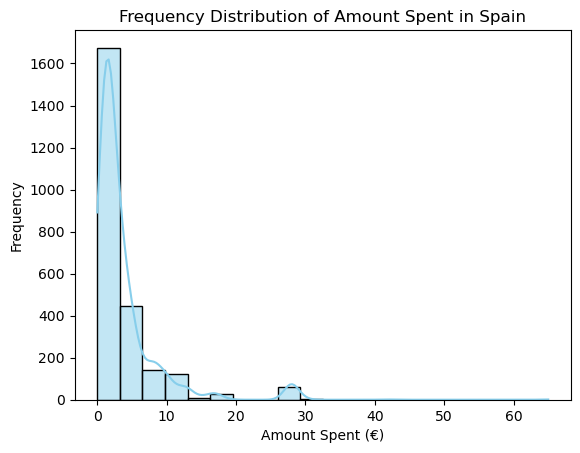

In [77]:
orders_spain = orders[orders["Country"] == "Spain"]


sns.histplot(orders_spain["UnitPrice"], bins=20, kde=True, color='skyblue')
plt.title("Frequency Distribution of Amount Spent in Spain")
plt.xlabel("Amount Spent (€)")
plt.ylabel("Frequency")
plt.show()

#### Select all orders made in the month of August

In [78]:
orders_august = orders[orders["month"] == 8]

print(orders_august)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds rib

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [79]:
orders_by_country_august = orders_august["Country"].value_counts()

print(orders_by_country_august)

Country
United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: count, dtype: int64


#### What's the  average amount of money spent by country

In [80]:
avg_spent_by_country = orders.groupby("Country")["UnitPrice"].mean()


print("Average amount spent by country:")
print(avg_spent_by_country)

Average amount spent by country:
Country
Australia                3.048523
Austria                  4.256030
Bahrain                  4.644118
Belgium                  3.630158
Brazil                   4.456250
Canada                   6.030331
Channel Islands          4.531618
Cyprus                   5.710391
Czech Republic           3.130800
Denmark                  3.146184
EIRE                     4.445880
European Community       4.830000
Finland                  5.296993
France                   4.415253
Germany                  3.708487
Greece                   4.574414
Iceland                  2.644011
Israel                   3.646935
Italy                    4.717955
Japan                    2.047383
Lebanon                  5.387556
Lithuania                2.841143
Malta                    4.867768
Netherlands              2.643982
Norway                   5.282155
Poland                   4.173364
Portugal                 5.925472
RSA                      4.277586
Saudi A

#### What's the most expensive item?

In [83]:
most_expensive_item = orders.loc[orders["UnitPrice"].idxmax(), "Description"]

print("The most expensive item is:", most_expensive_item)


The most expensive item is: postage


#### What was the average amount spent per year ?

In [89]:
avg_spent_per_year = orders.groupby("year")["UnitPrice"].mean()


print("Average amount spent per year:")
print(avg_spent_per_year)

Average amount spent per year:
year
2010    3.132095
2011    3.115054
Name: UnitPrice, dtype: float64
